In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.ignore('ignore')

AttributeError: module 'warnings' has no attribute 'ignore'

In [2]:
df=pd.read_csv('inventory_data_noisy.csv')
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles


In [3]:
print(df.isnull().sum())

Dealer_ID        0
Product_ID       0
Date             0
Quantity        92
Consumption     92
Location       184
dtype: int64


In [4]:
df_cleaned = df.dropna()
df_cleaned


,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles
...,...,...,...,...,...,...
18355,D001,P012,2022-02-19,71.0,15.0,Los Angeles
18356,D003,P014,2022-01-26,47.0,12.0,Los Angeles
18357,D001,P013,2022-02-14,89.0,8.0,Chicago
18358,D004,P017,2022-03-24,29.0,6.0,New York


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18360 entries, 0 to 18359
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dealer_ID    18360 non-null  object 
 1   Product_ID   18360 non-null  object 
 2   Date         18360 non-null  object 
 3   Quantity     18268 non-null  float64
 4   Consumption  18268 non-null  float64
 5   Location     18176 non-null  object 
dtypes: float64(2), object(4)
memory usage: 860.8+ KB


In [6]:
df.describe


<bound method NDFrame.describe of       Dealer_ID Product_ID        Date  Quantity  Consumption     Location
0          D000       P000  2022-01-01      62.0          8.0      Chicago
1          D000       P000  2022-01-02      70.0          9.0      Chicago
2          D000       P000  2022-01-03      12.0         17.0  Los Angeles
3          D000       P000  2022-01-04      74.0         13.0  Los Angeles
4          D000       P000  2022-01-05      57.0         10.0  Los Angeles
...         ...        ...         ...       ...          ...          ...
18355      D001       P012  2022-02-19      71.0         15.0  Los Angeles
18356      D003       P014  2022-01-26      47.0         12.0  Los Angeles
18357      D001       P013  2022-02-14      89.0          8.0      Chicago
18358      D004       P017  2022-03-24      29.0          6.0     New York
18359      D005       P003  2022-03-01      33.0          7.0      Chicago

[18360 rows x 6 columns]>

In [7]:
df.fillna(0)

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles
...,...,...,...,...,...,...
18355,D001,P012,2022-02-19,71.0,15.0,Los Angeles
18356,D003,P014,2022-01-26,47.0,12.0,Los Angeles
18357,D001,P013,2022-02-14,89.0,8.0,Chicago
18358,D004,P017,2022-03-24,29.0,6.0,New York


In [9]:
df.drop_duplicates(inplace=True)

In [15]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])


In [16]:
correlation_matrix = numeric_df.corr()


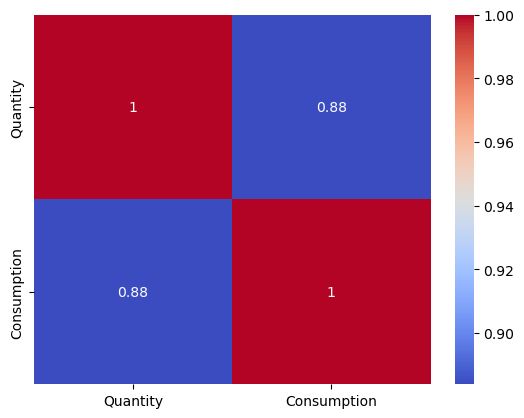

In [17]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [22]:
# Assuming 'City' is the location column you're grouping by
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Group by the 'City' column (or 'Location' if that's what you're using) and compute the mean
grouped_df = df.groupby('Location')[numeric_columns.columns].mean()

print(grouped_df)



              Quantity  Consumption
Location                           
Chicago      54.728073    12.016932
Los Angeles  54.679198    11.998651
New York     53.886125    12.100184


In [25]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Apply Z-score calculation for each numeric column
z_scores = stats.zscore(numeric_df)

# Find rows where Z-scores are greater than 3 for any numeric column
df_outliers = df[(np.abs(z_scores) > 3).any(axis=1)]  # Detect outliers across all numeric columns


In [27]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Original DataFrame

# Initialize OneHotEncoder (sparse_output=False to return a dense array)
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the 'productcategory' column to get the one-hot encoded features
encoded_features = encoder.fit_transform(df[['Location']])

# Create a DataFrame from the encoded features with proper column names
df_encoded = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

# Print the result
print(df_encoded)

       Location_Chicago  Location_Los Angeles  Location_New York  Location_nan
0                   1.0                   0.0                0.0           0.0
1                   1.0                   0.0                0.0           0.0
2                   0.0                   1.0                0.0           0.0
3                   0.0                   1.0                0.0           0.0
4                   0.0                   1.0                0.0           0.0
...                 ...                   ...                ...           ...
18006               0.0                   0.0                0.0           1.0
18007               1.0                   0.0                0.0           0.0
18008               1.0                   0.0                0.0           0.0
18009               1.0                   0.0                0.0           0.0
18010               1.0                   0.0                0.0           0.0

[18011 rows x 4 columns]


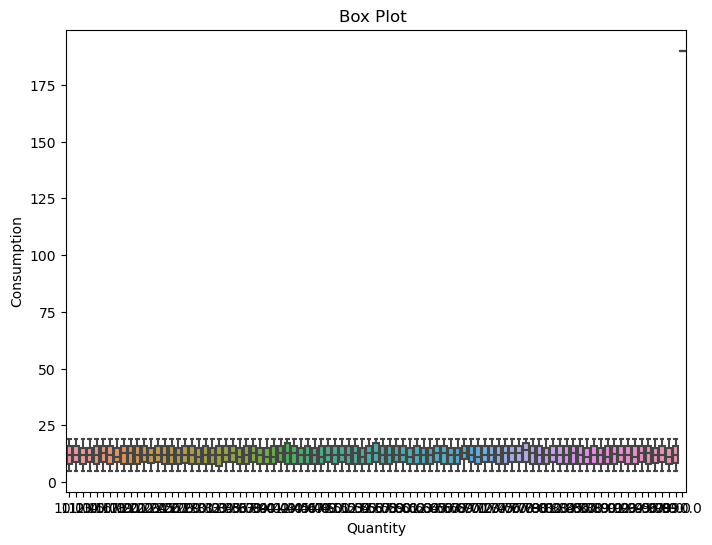

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Quantity', y='Consumption', data=df)
plt.title('Box Plot ')
plt.show()

In [34]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['scaled_column'] = scaler.fit_transform(df[['Quantity']])

In [36]:
df['Year'] = pd.to_datetime(df['Date']).dt.year


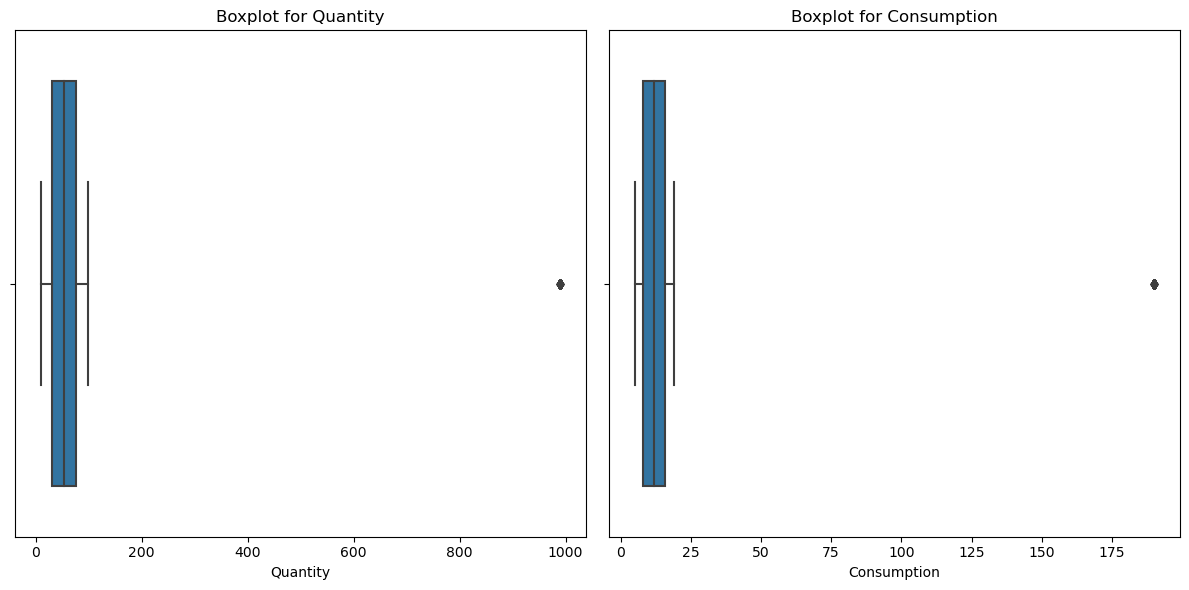

In [39]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create boxplots for detecting outliers in 'Quantity' and 'Consumption'
plt.figure(figsize=(12, 6))

# Boxplot for Quantity
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot for Quantity')

# Boxplot for Consumption
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Consumption'])
plt.title('Boxplot for Consumption')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Histogram for Quantity')

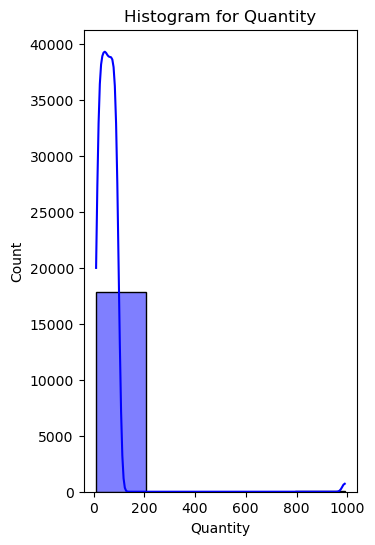

In [40]:
# Visualize the distribution of 'Quantity'
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['Quantity'], kde=True, bins=5, color='blue')
plt.title('Histogram for Quantity')


TypeError: datetime64 type does not support sum operations

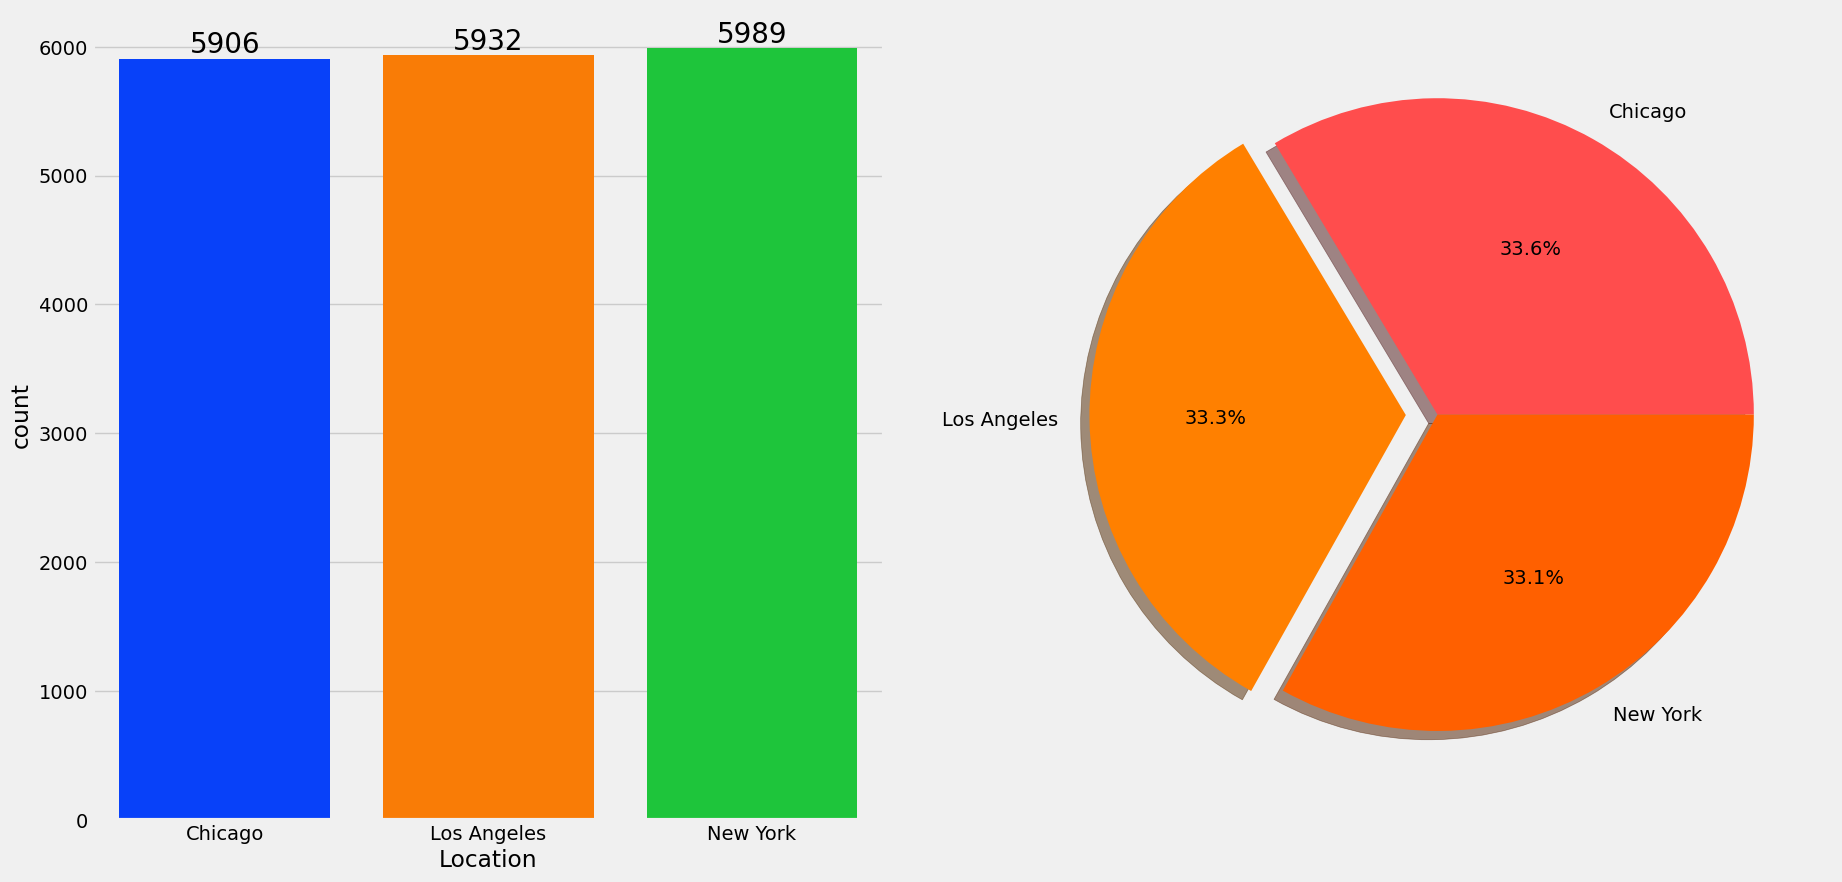

In [43]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Location'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Location'].value_counts(),labels=['Chicago','Los Angeles','New York'],explode=[0,0.1,0],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000','#ff6000'])
plt.show()


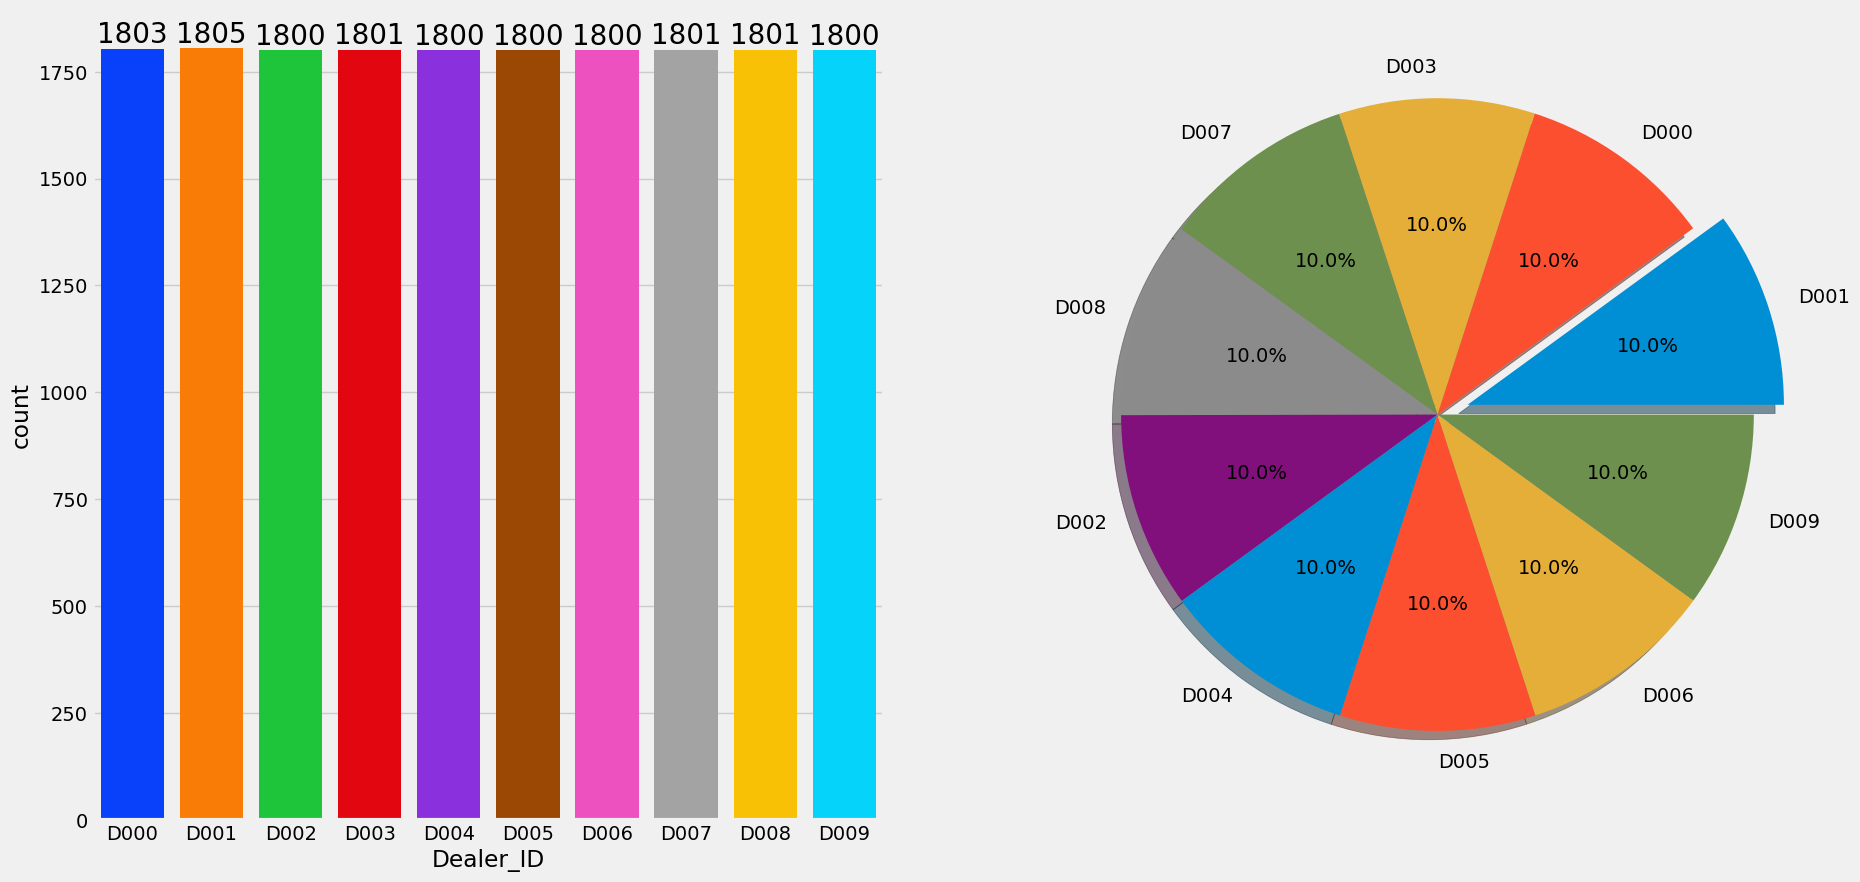

In [44]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Dealer_ID'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['Dealer_ID'].value_counts(),labels=df['Dealer_ID'].value_counts().index,explode=[0.1,0,0,0,0,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

ValueError: Could not interpret value `Consumption_Level` for parameter `hue`

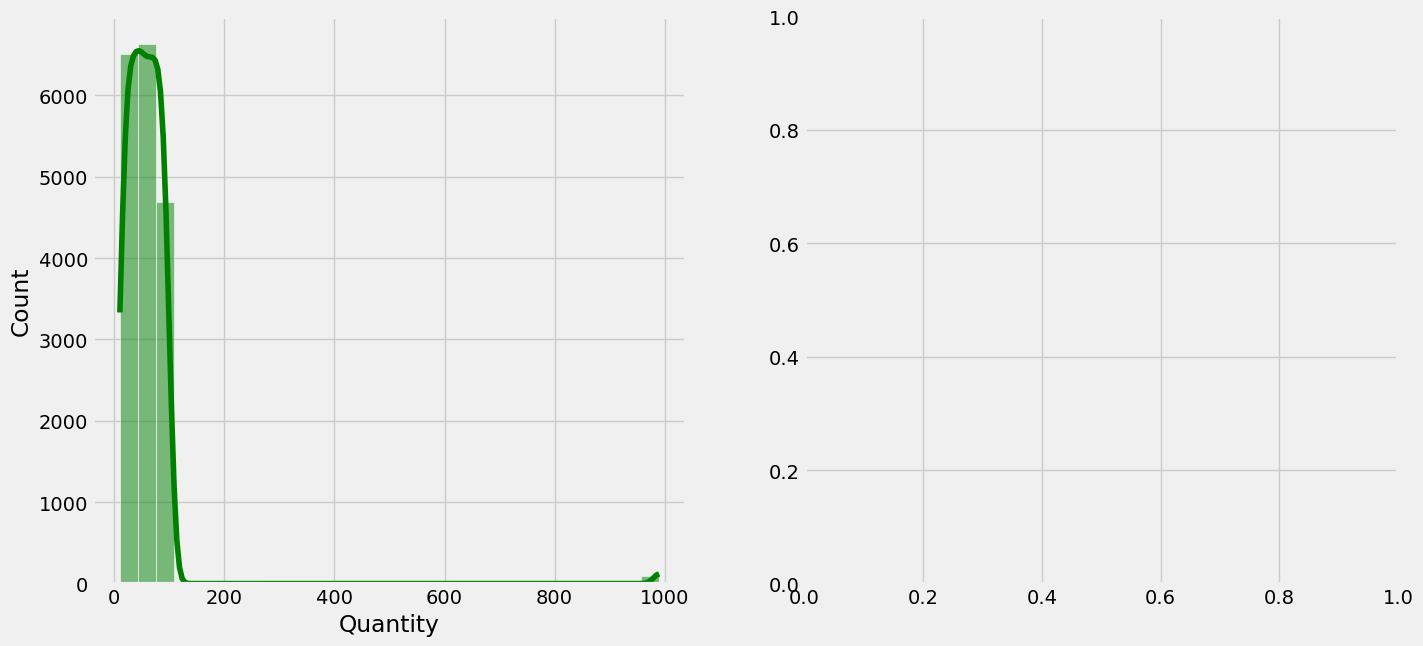

In [47]:
## Histogram & KDE
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Quantity',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Quantity',kde=True,hue='Consumption_Level')
plt.show()